Enoncé

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.

Logo seattle
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

Votre prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

Réaliser une courte analyse exploratoire.
Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
data = pd.read_csv('Source/2016_Building_Energy_Benchmarking.csv',sep=';')

In [3]:
data

,TIPS,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,8 colonnes max,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,Regarder rapidement les valeurs (nettoyage),2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,NaN,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,NaN,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,NaN,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,NaN,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,NaN,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,NaN,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,NaN,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [4]:
data.dtypes

TIPS                                object
OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestProp

In [5]:
data.shape

(3376, 47)

In [6]:
data.isna().mean()

TIPS                               0.999408
OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.004739
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.002370
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.002666
LargestPropertyUseType          

<AxesSubplot:>

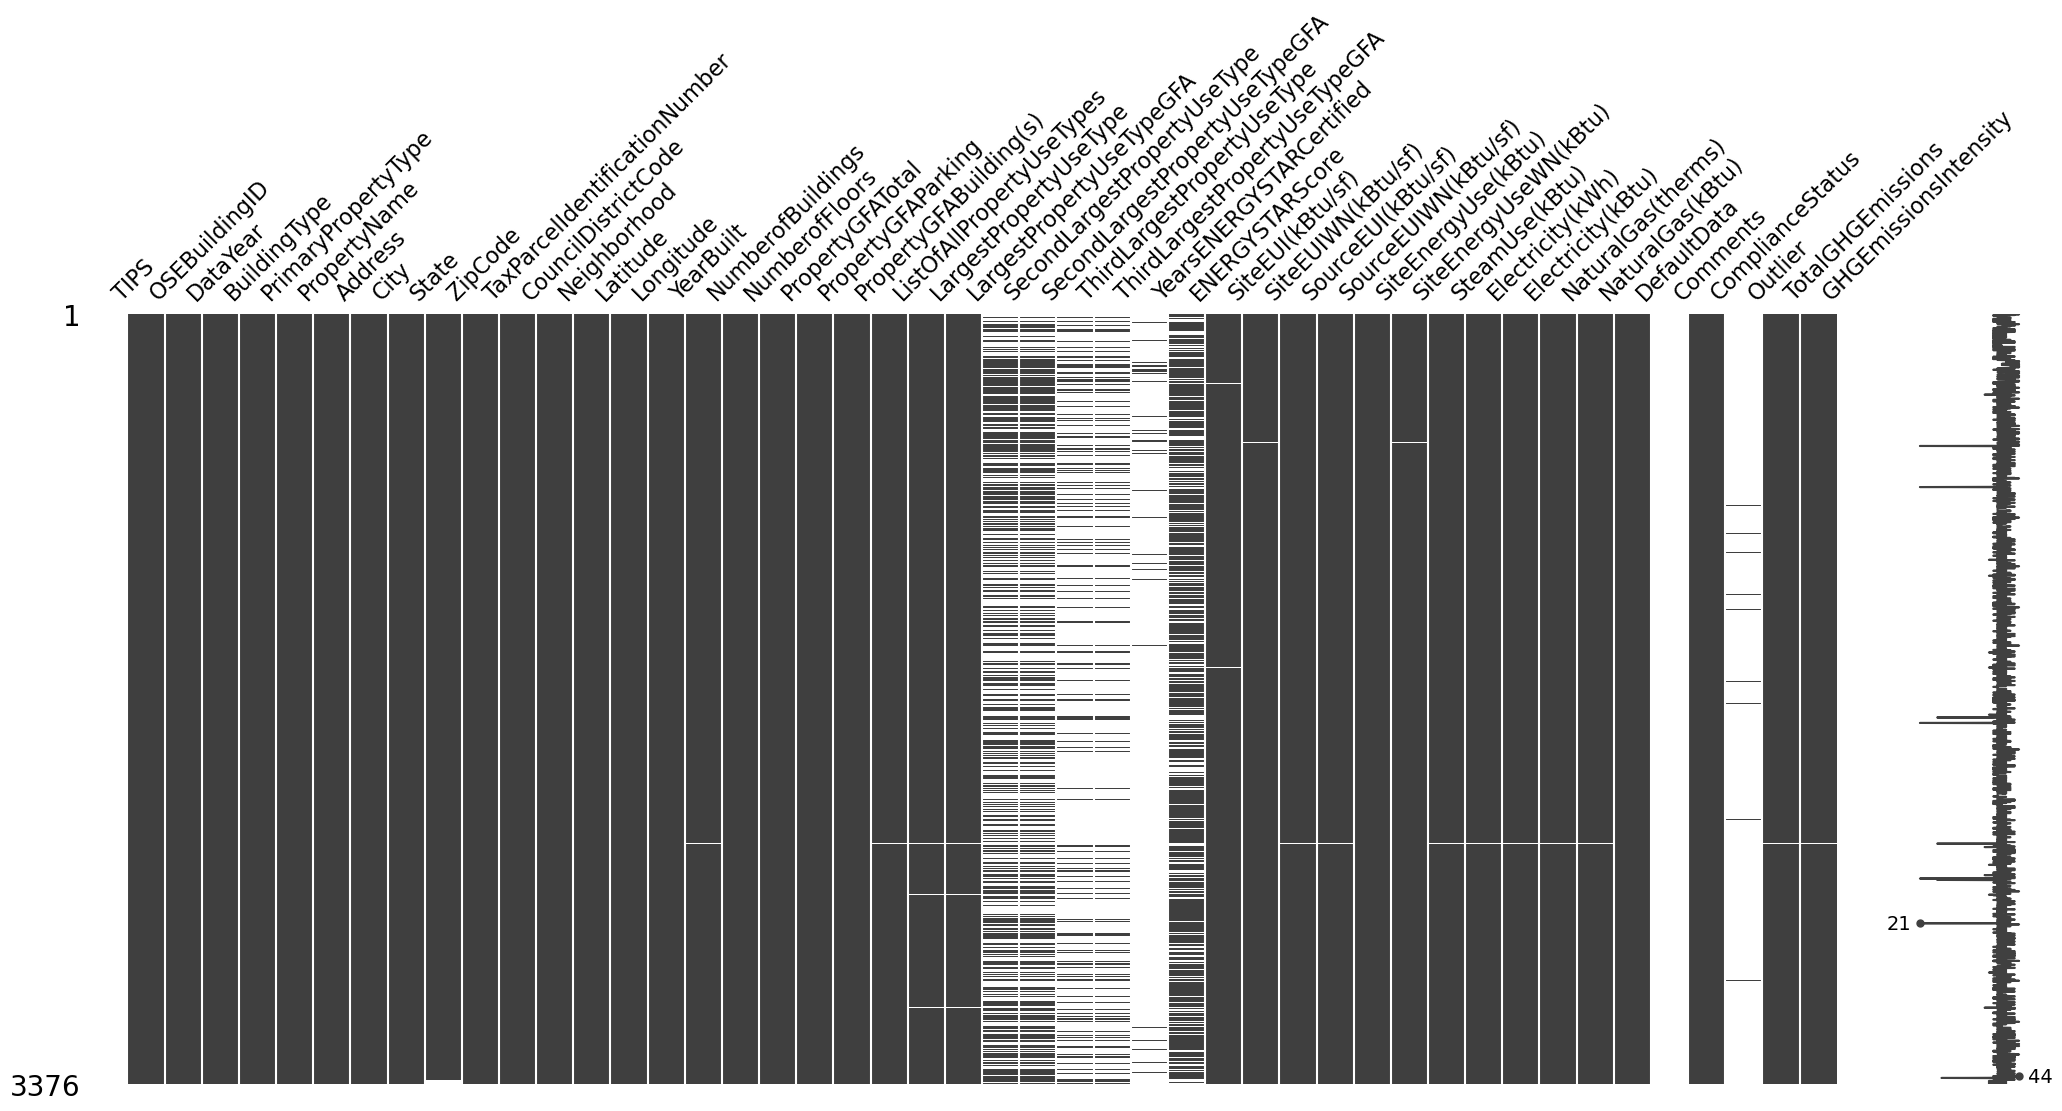

In [7]:
msno.matrix(data)

In [8]:
# en gris :  BuildingType, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, ENERGYSTARScore,
# en jaune : PropertyGFAParking, PropertyGFABuilding(s), PrimaryPropertyType, PropertyName.
# en orange :  SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu). 

## Traitement des valeurs manquantes

In [9]:
variable = ['BuildingType','Latitude','Longitude','YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal','ENERGYSTARScore','SiteEnergyUseWN(kBtu)','TotalGHGEmissions']
data = data.loc[:,variable]
data

,BuildingType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,47.61220,-122.33799,1927,1.0,12,88434,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996,1.0,11,103566,61.0,8.664479e+06,295.86
2,NonResidential,47.61393,-122.33810,1969,1.0,41,956110,43.0,7.393711e+07,2089.28
3,NonResidential,47.61412,-122.33664,1926,1.0,10,61320,56.0,6.946800e+06,286.43
4,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,75.0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,47.56722,-122.31154,1990,1.0,1,12294,46.0,9.430032e+05,20.94
3372,Nonresidential COS,47.59625,-122.32283,2004,1.0,1,16000,NaN,1.053706e+06,32.17
3373,Nonresidential COS,47.63644,-122.35784,1974,1.0,1,13157,NaN,6.053764e+06,223.54
3374,Nonresidential COS,47.52832,-122.32431,1989,1.0,1,14101,NaN,7.828413e+05,22.11


<AxesSubplot:>

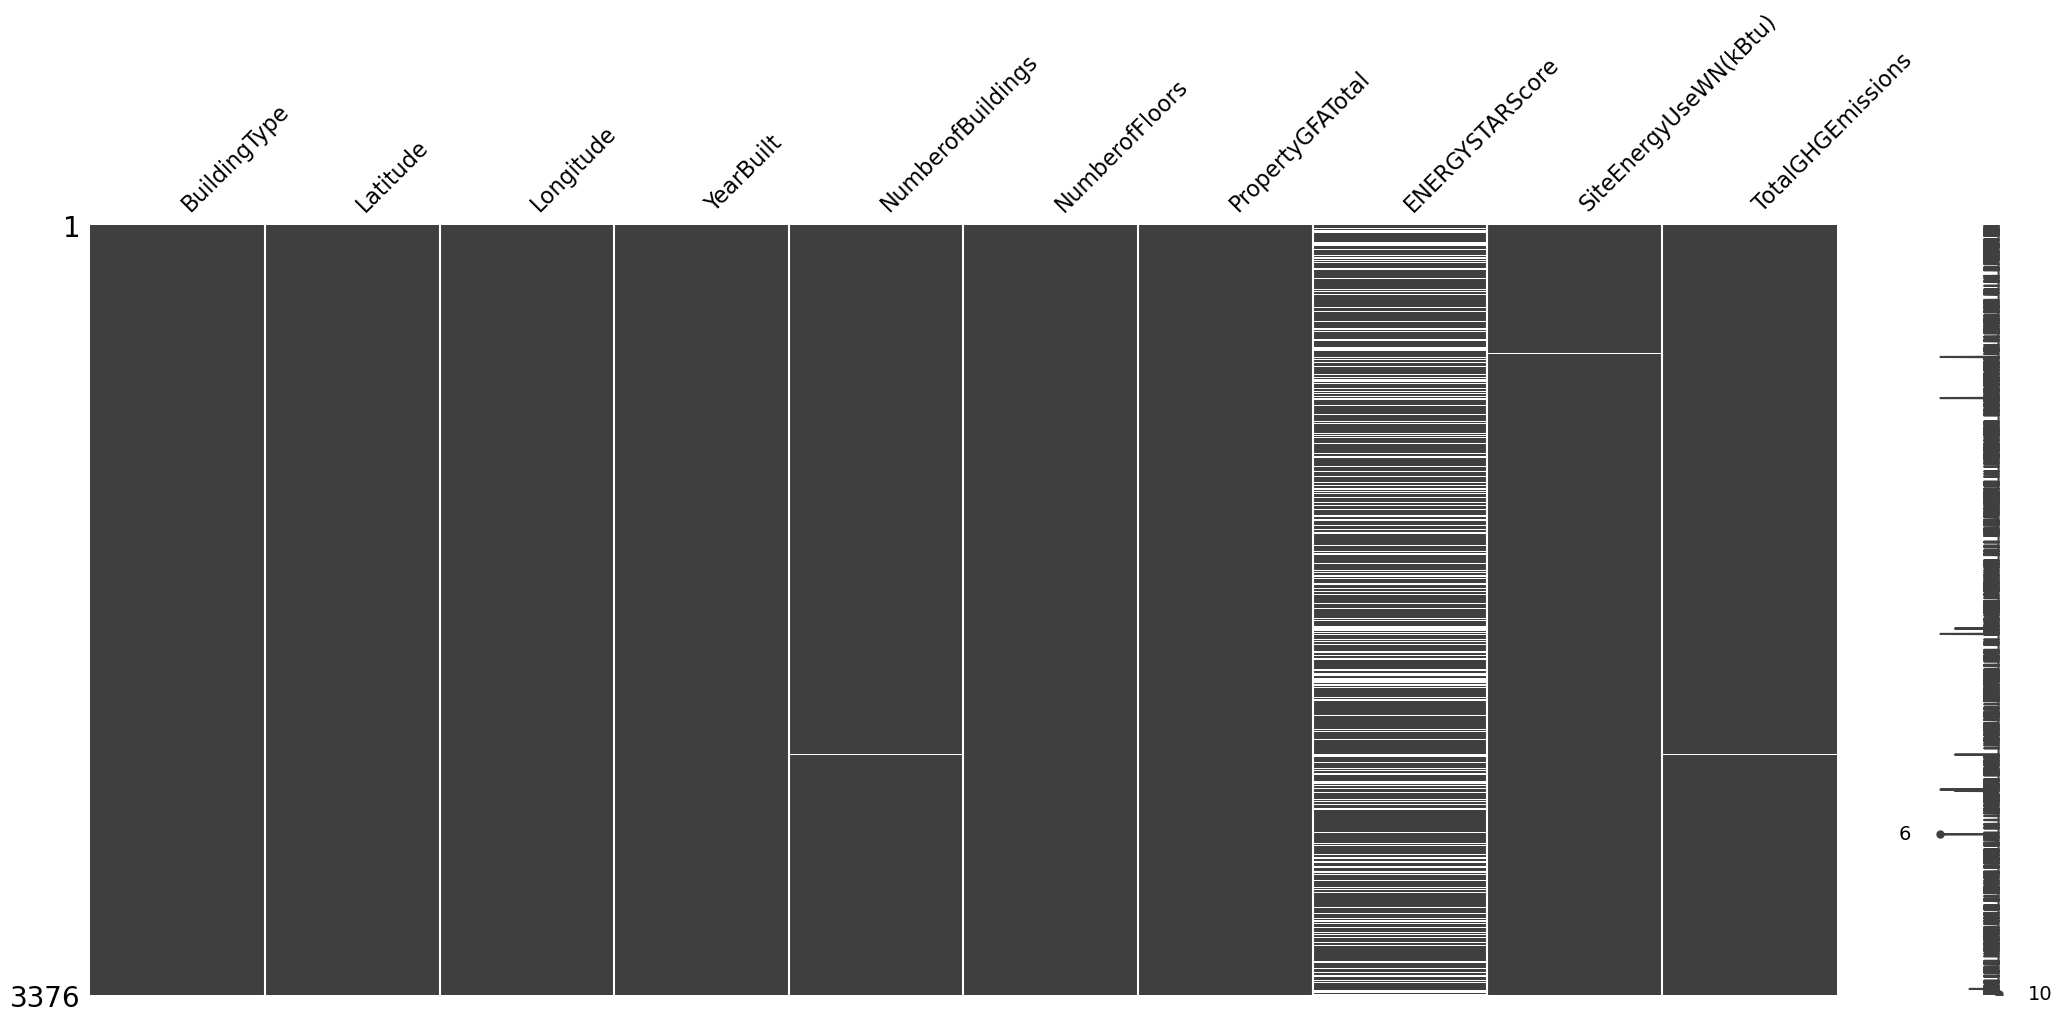

In [10]:
msno.matrix(data)

In [11]:
data.isna().mean()

BuildingType             0.000000
Latitude                 0.000000
Longitude                0.000000
YearBuilt                0.000000
NumberofBuildings        0.002370
NumberofFloors           0.000000
PropertyGFATotal         0.000000
ENERGYSTARScore          0.249704
SiteEnergyUseWN(kBtu)    0.001777
TotalGHGEmissions        0.002666
dtype: float64

In [12]:
data = data.loc[data.TotalGHGEmissions.notnull()]
data = data.loc[data['SiteEnergyUseWN(kBtu)'].notnull()]



In [13]:
data.isna().mean()

BuildingType             0.000000
Latitude                 0.000000
Longitude                0.000000
YearBuilt                0.000000
NumberofBuildings        0.000000
NumberofFloors           0.000000
PropertyGFATotal         0.000000
ENERGYSTARScore          0.247772
SiteEnergyUseWN(kBtu)    0.000000
TotalGHGEmissions        0.000000
dtype: float64

## Information sur la variable Energy Star 

Analyze Benchmarking Results
Once you’ve successfully benchmarked your building in Portfolio Manager, you’ll have access to more than 100 different metrics to track and assess your performance. Find out what your results mean and what steps to take next. 

What your 1 – 100 ENERGY STAR score means
Ways to benchmark using EUI
What your 1 – 100 ENERGY STAR score means
The ENERGY STAR score provides a comprehensive snapshot of your building’s energy performance, taking into account the building’s physical assets, operations, and occupant behavior. It is expressed on an easy-to-understand 1 to 100 scale, where the higher the score, the better the energy performance of the building. It’ll help you identify which buildings in your portfolio to target for improvement or recognition.

A score of 50 is the median. Lower is worse than average; higher is better.

What the 1-100 ENERGY STAR score does (and doesn’t) tell you
EPA, in conjunction with stakeholders, developed the 1 – 100 ENERGY STAR score as a screening tool; it does not by itself explain why a building performs a certain way, or how to change the building’s performance. It does, however, help you assess how your building is performing and identify which buildings offer the best opportunities for improvement or recognition.

The Score Does :

- Evaluate actual billed energy data
- Normalize for business activity (hours, workers, climate)
- Compare buildings to the national population
- Indicate the level of energy performance


The Score Does Not :

- Sum the energy use of each piece of equipment
- Credit specific technologies
- Compare buildings with others in Portfolio Manager
- Explain why a building performs well or poorly

In [14]:
data.shape

(3366, 10)

In [15]:
data['ENERGYSTARScore'].isna().mean()

0.24777183600713013

In [16]:
ls

 Le volume dans le lecteur C n’a pas de nom.
 Le numéro de série du volume est A65D-8B05

 Répertoire de C:\Users\Dragomir\Anticiper_les_besoins_de_consommation_de_batiment_Stojanovic_Dragomir

05/04/2023  15:32    <DIR>          .
29/03/2023  14:43    <DIR>          ..
03/04/2023  15:44    <DIR>          .ipynb_checkpoints
03/04/2023  15:40    <DIR>          Clenead
05/04/2023  15:32             9 395 notebook_modelisation_01.ipynb
05/04/2023  15:30            10 599 notebook02_exploration.ipynb
29/03/2023  21:06    <DIR>          Source
05/04/2023  15:32           655 625 Stojanovic_Dragomir_1_notebook_exploratoire_29032023.ipynb
               3 fichier(s)          675 619 octets
               5 Rép(s)  42 875 588 608 octets libres


In [17]:
data2 = data.copy()

## save energy

Save Energy
If you haven’t already, set up an account in ENERGY STAR Portfolio Manager to start benchmarking your building. Benchmarking will help you identify underperforming buildings to target for cost-effective measures and help you verify reductions from energy-saving efforts.

Conduct a Treasure Hunt
The first step to saving energy in your building is to start by looking. During an Energy Treasure Hunt, teams walk around a facility looking for quick ways to save energy. Those quick fixes can add up to big savings. Hundreds of organizations have used Energy Treasure Hunts to reduce their facilities’ energy use by 15 percent or more.

Ways to Save  
Start saving with no- and low-cost approaches, and then use savings to pay for more extensive upgrades:


Upgrade your lighting. If your building relies on inefficient lighting, such as incandescent, halogen, HID, or T12 fluorescent, you’re missing out on significant savings. Updating your lighting can be a great first step when it comes to making your building an efficient one.
Operations & maintenance best practices. Efficient building operation reduces operating costs, maintains comfort, and extends equipment lifetime, all without significant capital investment.
Checklists of energy-saving measures. These checklists include energy-saving measures that can be implemented at no or low cost, or with rapid payback.
Energy-efficient products. Purchasing efficient products reduces energy costs without compromising quality. Learn more about ENERGY STAR certified products, estimate potential savings, and specify them in your purchasing policies and contracts.
Energy-saving competitions. Competitions can be a great way to motivate your team to find new efficiencies, engage occupants in your efforts, and multiply savings across your portfolio – all while helping the environment.
Building upgrades. Maximize your financial and energy savings by taking a staged approached to building upgrades that accounts for energy flows among systems.
Water, waste, and renewable energy. Check out EPA resources to expand your sustainability work to reduce water use, manage waste and materials, or purchase or install renewable energy.
Find Expert Help
EPA’s network of service and product providers (SPPs) have partnered with ENERGY STAR to offer you expert help with energy management when you need it. Many also offer innovative financing options and can help you identify, prioritize, and implement energy projects that not only cut costs and offset emissions, but can make your building more comfortable, too.

Evaluate the Economics of Energy Efficiency Projects
Making the business case for energy efficiency-related capital expense requires economic analysis. EPA provides several tools to help evaluate the economics of an energy efficiency project.

Finance Energy-Efficiency Projects
Don’t have cash on hand to pay for upgrades? Energy-efficiency projects are relatively low-risk investments, and there are many opportunities to finance energy-efficiency projects. In addition to traditional sources of funding, many utilities, governments, and nonprofit organizations offer financial support through grants, rebates, and loans. Well-designed efficiency projects are almost always fundable. With some dedicated research, a diligent organization may find special deals that save a significant amount of money. Remember there is a cost for not undertaking an efficiency investment.

Comprehensive Energy Management
Based on the successful practices of ENERGY STAR partners, EPA created guidelines that can help your organization plan and implement a comprehensive energy management program that delivers deep, sustained energy savings.

In [18]:
# recherche de valeur aberrante et atypique

data2.describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
count,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3.366000e+03,2532.000000,3.366000e+03,3366.000000
mean,47.624012,-122.334792,1968.571004,1.106952,4.711527,9.498861e+04,67.908768,5.281993e+06,119.727109
std,0.047768,0.027175,33.105435,2.109027,5.502043,2.191373e+05,26.873953,1.594752e+07,538.912254
min,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,1.000000,0.000000e+00,-0.800000
25%,47.599860,-122.350635,1948.000000,1.000000,2.000000,2.849400e+04,53.000000,9.737943e+05,9.492500
50%,47.618665,-122.332485,1975.000000,1.000000,4.000000,4.429100e+04,75.000000,1.907221e+06,33.920000
75%,47.657080,-122.319475,1997.000000,1.000000,5.000000,9.111875e+04,90.000000,4.383889e+06,93.860000
max,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,100.000000,4.716139e+08,16870.980000


In [20]:
data2

,BuildingType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,47.61220,-122.33799,1927,1.0,12,88434,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996,1.0,11,103566,61.0,8.664479e+06,295.86
2,NonResidential,47.61393,-122.33810,1969,1.0,41,956110,43.0,7.393711e+07,2089.28
3,NonResidential,47.61412,-122.33664,1926,1.0,10,61320,56.0,6.946800e+06,286.43
4,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,75.0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,47.56722,-122.31154,1990,1.0,1,12294,46.0,9.430032e+05,20.94
3372,Nonresidential COS,47.59625,-122.32283,2004,1.0,1,16000,NaN,1.053706e+06,32.17
3373,Nonresidential COS,47.63644,-122.35784,1974,1.0,1,13157,NaN,6.053764e+06,223.54
3374,Nonresidential COS,47.52832,-122.32431,1989,1.0,1,14101,NaN,7.828413e+05,22.11


In [21]:
data2['BuildingType'].value_counts()

NonResidential          1457
Multifamily LR (1-4)    1011
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [22]:
data2 = data2.loc[~data2.BuildingType.str.contains('Multi')]
data2

,BuildingType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,47.61220,-122.33799,1927,1.0,12,88434,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996,1.0,11,103566,61.0,8.664479e+06,295.86
2,NonResidential,47.61393,-122.33810,1969,1.0,41,956110,43.0,7.393711e+07,2089.28
3,NonResidential,47.61412,-122.33664,1926,1.0,10,61320,56.0,6.946800e+06,286.43
4,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,75.0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,47.56722,-122.31154,1990,1.0,1,12294,46.0,9.430032e+05,20.94
3372,Nonresidential COS,47.59625,-122.32283,2004,1.0,1,16000,NaN,1.053706e+06,32.17
3373,Nonresidential COS,47.63644,-122.35784,1974,1.0,1,13157,NaN,6.053764e+06,223.54
3374,Nonresidential COS,47.52832,-122.32431,1989,1.0,1,14101,NaN,7.828413e+05,22.11


In [23]:
data2.BuildingType.value_counts()

NonResidential        1457
SPS-District K-12       98
Nonresidential COS      85
Campus                  24
Nonresidential WA        1
Name: BuildingType, dtype: int64

<AxesSubplot:>

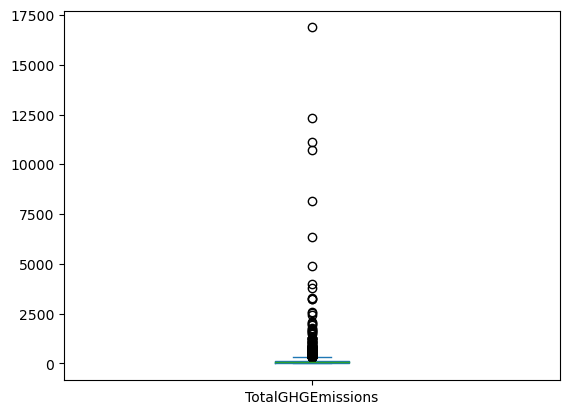

In [24]:
data2.TotalGHGEmissions.plot(kind = 'box')

<AxesSubplot:>

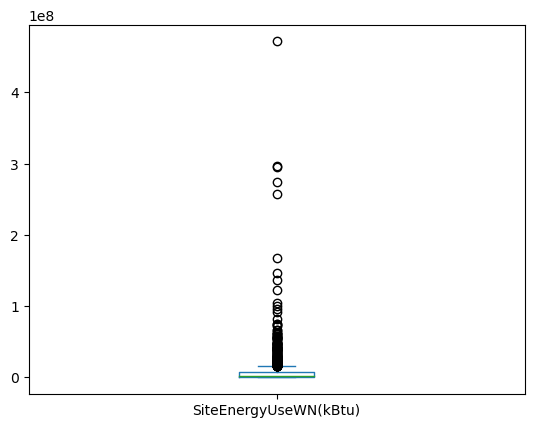

In [25]:
data2['SiteEnergyUseWN(kBtu)'].plot(kind = 'box')

In [26]:
data2.describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1.665000e+03,1093.000000,1.665000e+03,1665.000000
mean,47.616037,-122.332912,1961.946547,1.168769,4.120721,1.189277e+05,65.424520,8.064790e+06,185.018835
std,0.048197,0.024596,32.744827,2.932286,6.568735,2.976171e+05,28.493766,2.203878e+07,752.199624
min,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,1.000000,0.000000e+00,-0.800000
25%,47.585420,-122.343280,1930.000000,1.000000,1.000000,2.949800e+04,48.000000,1.294615e+06,19.930000
50%,47.612340,-122.332940,1965.000000,1.000000,2.000000,4.928000e+04,73.000000,2.685146e+06,49.580000
75%,47.649650,-122.321710,1989.000000,1.000000,4.000000,1.051000e+05,89.000000,7.109712e+06,142.390000
max,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,100.000000,4.716139e+08,16870.980000


In [27]:
data3 = data2[(data2['TotalGHGEmissions'] < 2_500)&(data2['SiteEnergyUseWN(kBtu)'] < 15_000_000)]
data3

,BuildingType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,47.61220,-122.33799,1927,1.0,12,88434,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996,1.0,11,103566,61.0,8.664479e+06,295.86
3,NonResidential,47.61412,-122.33664,1926,1.0,10,61320,56.0,6.946800e+06,286.43
4,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,75.0,1.465650e+07,505.01
5,Nonresidential COS,47.61623,-122.33657,1999,1.0,2,97288,NaN,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,47.56722,-122.31154,1990,1.0,1,12294,46.0,9.430032e+05,20.94
3372,Nonresidential COS,47.59625,-122.32283,2004,1.0,1,16000,NaN,1.053706e+06,32.17
3373,Nonresidential COS,47.63644,-122.35784,1974,1.0,1,13157,NaN,6.053764e+06,223.54
3374,Nonresidential COS,47.52832,-122.32431,1989,1.0,1,14101,NaN,7.828413e+05,22.11


In [28]:
data3.describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
count,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1.469000e+03,964.000000,1.469000e+03,1469.000000
mean,47.615781,-122.332884,1959.961879,1.024506,3.032675,6.921803e+04,66.133817,3.554018e+06,75.337917
std,0.049978,0.025255,32.748212,0.443787,3.644864,7.754285e+04,27.972612,3.401993e+06,92.869351
min,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,1.000000,0.000000e+00,-0.800000
25%,47.581680,-122.344130,1929.000000,1.000000,1.000000,2.803200e+04,49.750000,1.181649e+06,17.310000
50%,47.612300,-122.332470,1963.000000,1.000000,2.000000,4.361500e+04,73.000000,2.246748e+06,41.960000
75%,47.651760,-122.320830,1988.000000,1.000000,4.000000,7.689300e+04,89.000000,4.899096e+06,92.920000
max,47.733870,-122.258640,2015.000000,6.000000,99.000000,1.400000e+06,100.000000,1.491342e+07,940.470000


In [29]:
data3.to_csv('./Clenead/data.csv',index = False)